In [ ]:
!pip install scanpy

In [ ]:
import anndata as ad
import pooch
import scanpy as sc

In [ ]:
EXAMPLE_DATA = pooch.create(
    path=pooch.os_cache("scverse_tutorials"),
    base_url="doi:10.6084/m9.figshare.22716739.v1/",
)
EXAMPLE_DATA.load_registry_from_doi()

In [ ]:
samples = {
    "s1d1": "s1d1_filtered_feature_bc_matrix.h5",
    "s1d3": "s1d3_filtered_feature_bc_matrix.h5",
}
adatas = {}

for sample_id, filename in samples.items():
    path = EXAMPLE_DATA.fetch(filename)
    sample_adata = sc.read_10x_h5(path)
    sample_adata.var_names_make_unique()
    adatas[sample_id] = sample_adata

adata = ad.concat(adatas, label="sample")
adata.obs_names_make_unique()

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_n

In [ ]:
# mitochondrial genes
adata.var["mt"] = adata.var_names.str.startswith("MT-")  # "MT-" for human, "Mt-" for mouse
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes
adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]")

In [ ]:
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True)

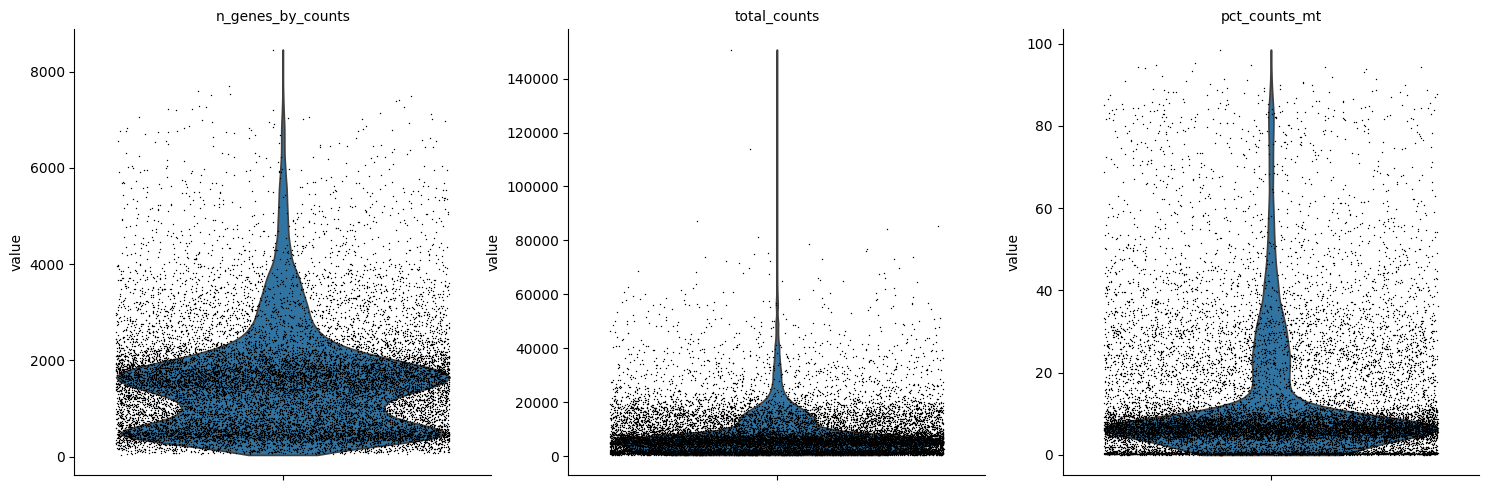

In [ ]:
sc.pl.violin(adata, ["n_genes_by_counts", "total_counts", "pct_counts_mt"], jitter=0.4, multi_panel=True)

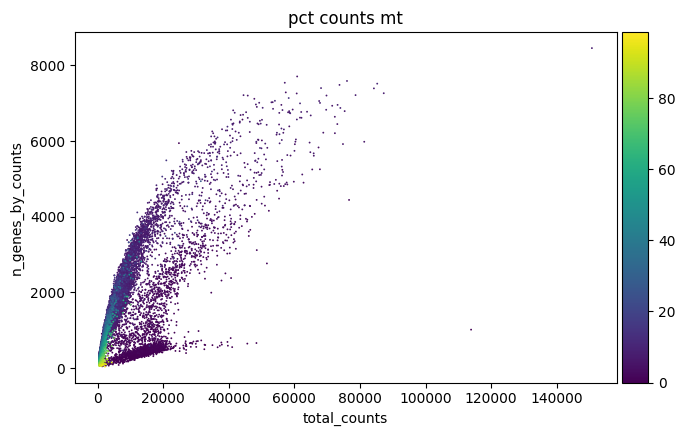

In [ ]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

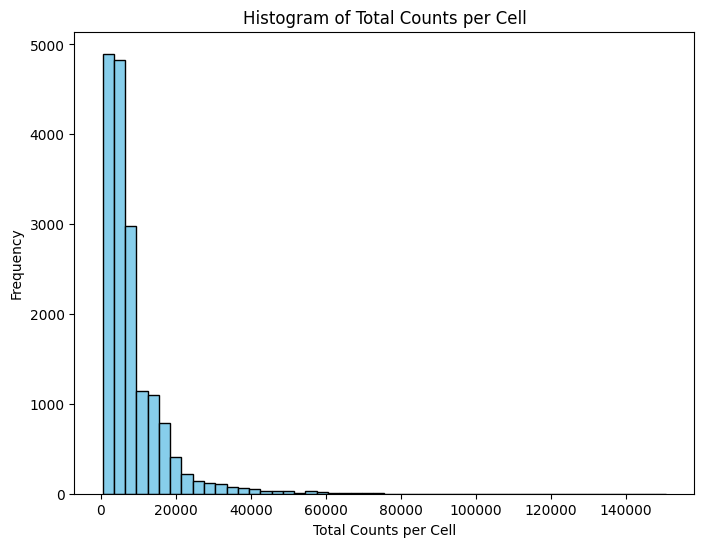

In [ ]:
import matplotlib.pyplot as plt
# Plot a histogram of total counts per cell
plt.figure(figsize=(8, 6))
plt.hist(adata.obs['total_counts'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Total Counts per Cell')
plt.ylabel('Frequency')
plt.title('Histogram of Total Counts per Cell')
plt.show()

In [ ]:
sc.pp.filter_cells(adata, max_counts=60000)
sc.pp.filter_genes(adata, min_cells=3)

In [ ]:
adata.layers["counts"] = adata.X.copy()

In [ ]:
adata.X.max()

30420.0

In [ ]:
# Normalizing to median total counts
sc.pp.normalize_total(adata)
# Logarithmize the data:
sc.pp.log1p(adata)

In [ ]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000, batch_key="sample")

In [ ]:
adata.var

,mt,ribo,hb,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm,highly_variable_nbatches,highly_variable_intersection
AL627309.1,False,False,False,40,0.002336,0.002333,99.766423,40.0,3.713572,40,False,0.002251,0.526019,-0.173984,0,False
AL627309.3,False,False,False,3,0.000175,0.000175,99.982482,3.0,1.386294,3,False,0.000170,0.178495,-0.758368,0,False
AL627309.5,False,False,False,155,0.009460,0.009415,99.094891,162.0,5.093750,155,False,0.010579,0.888334,0.434217,0,False
AL627309.4,False,False,False,7,0.000409,0.000409,99.959124,7.0,2.079442,7,False,0.000429,0.249261,-0.641351,0,False
AP006222.2,False,False,False,3,0.000234,0.000234,99.982482,4.0,1.609438,3,False,0.000167,-0.218038,-1.419536,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC004556.3,False,False,False,827,0.063358,0.061432,95.170803,1085.0,6.990256,803,False,0.031419,0.139063,-0.336322,0,False
AC233755.2,False,False,False,10,0.000818,0.000817,99.941606,14.0,2.708050,10,False,0.000881,0.497560,-0.225664,0,False
AC233755.1,False,False,False,45,0.004613,0.004603,99.737226,79.0,4.382027,45,False,0.003132,0.363917,-0.445227,0,False
AC141272.1,False,False,False,3,0.000175,0.000175,99.982482,3.0,1.386294,3,False,0.000069,-0.934508,-2.632821,0,False


In [ ]:
sc.tl.pca(adata)

In [ ]:
sc.pp.neighbors(adata)

In [ ]:
sc.tl.umap(adata)

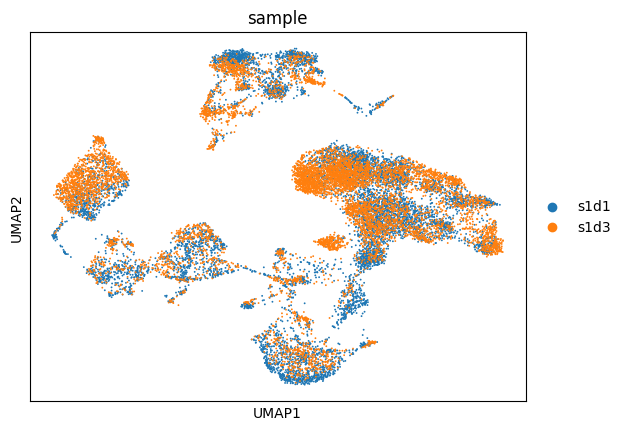

In [ ]:
sc.pl.umap(adata, color="sample")

In [ ]:
adata.obs

,sample,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo,total_counts_hb,log1p_total_counts_hb,pct_counts_hb,n_counts
AAACCCAAGGATGGCT-1,s1d1,2103,7.651596,8663.0,9.066932,42.721921,59.667552,69.744892,79.348955,460.0,6.133398,5.309938,3650.0,8.202756,42.133209,17.0,2.890372,0.196237,8663.0
AAACCCAAGGCCTAGA-1,s1d1,3916,8.273081,12853.0,9.461411,35.843772,44.262040,52.376877,62.763557,1790.0,7.490530,13.926710,1719.0,7.450079,13.374310,58.0,4.077538,0.451257,12853.0
AAACCCAAGTGAGTGC-1,s1d1,683,6.527958,1631.0,7.397562,56.284488,62.599632,70.386266,88.779890,581.0,6.366470,35.622318,63.0,4.158883,3.862661,13.0,2.639057,0.797057,1631.0
AAACCCACAAGAGGCT-1,s1d1,4330,8.373554,17345.0,9.761117,27.662150,38.420294,48.901701,62.023638,780.0,6.660575,4.496973,3936.0,8.278174,22.692417,44.0,3.806663,0.253675,17345.0
AAACCCACATCGTGGC-1,s1d1,325,5.786897,555.0,6.320768,49.909910,59.459459,77.477477,100.000000,159.0,5.075174,28.648647,26.0,3.295837,4.684685,26.0,3.295837,4.684685,555.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGAGAGTCTGG-1,s1d3,277,5.627621,615.0,6.423247,63.089431,71.219512,87.479675,100.000000,282.0,5.645447,45.853661,35.0,3.583519,5.691057,20.0,3.044523,3.252032,615.0
TTTGTTGCAGACAATA-1,s1d3,3797,8.242230,13218.0,9.489410,30.753518,44.628537,53.691935,64.684521,864.0,6.762730,6.536541,3997.0,8.293550,30.239067,42.0,3.761200,0.317749,13218.0
TTTGTTGCATGTTACG-1,s1d3,3089,8.035926,27280.0,10.213945,64.409824,71.671554,78.317449,85.054985,1025.0,6.933423,3.757332,3562.0,8.178358,13.057184,13145.0,9.483872,48.185482,27280.0
TTTGTTGGTAGTCACT-1,s1d3,379,5.940171,698.0,6.549651,52.865330,60.028653,74.355301,100.000000,143.0,4.969813,20.487106,58.0,4.077538,8.309455,39.0,3.688879,5.587393,698.0


In [ ]:
!pip3 install igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 58.9 MB/s eta 0:00:00


In [ ]:
sc.tl.leiden(adata, flavor="igraph",resolution=0.5)

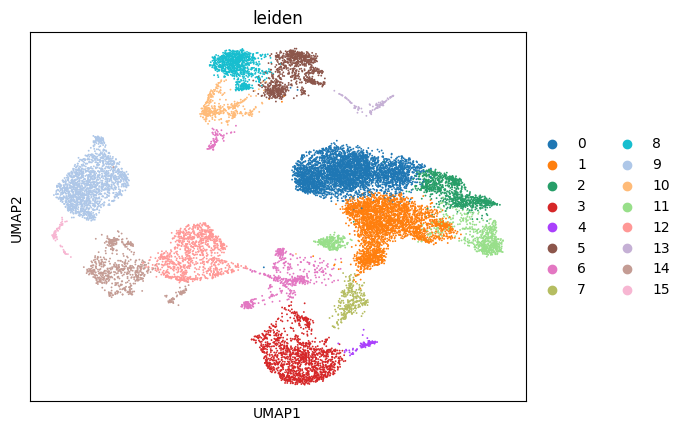

In [ ]:
sc.pl.umap(adata, color=["leiden"])

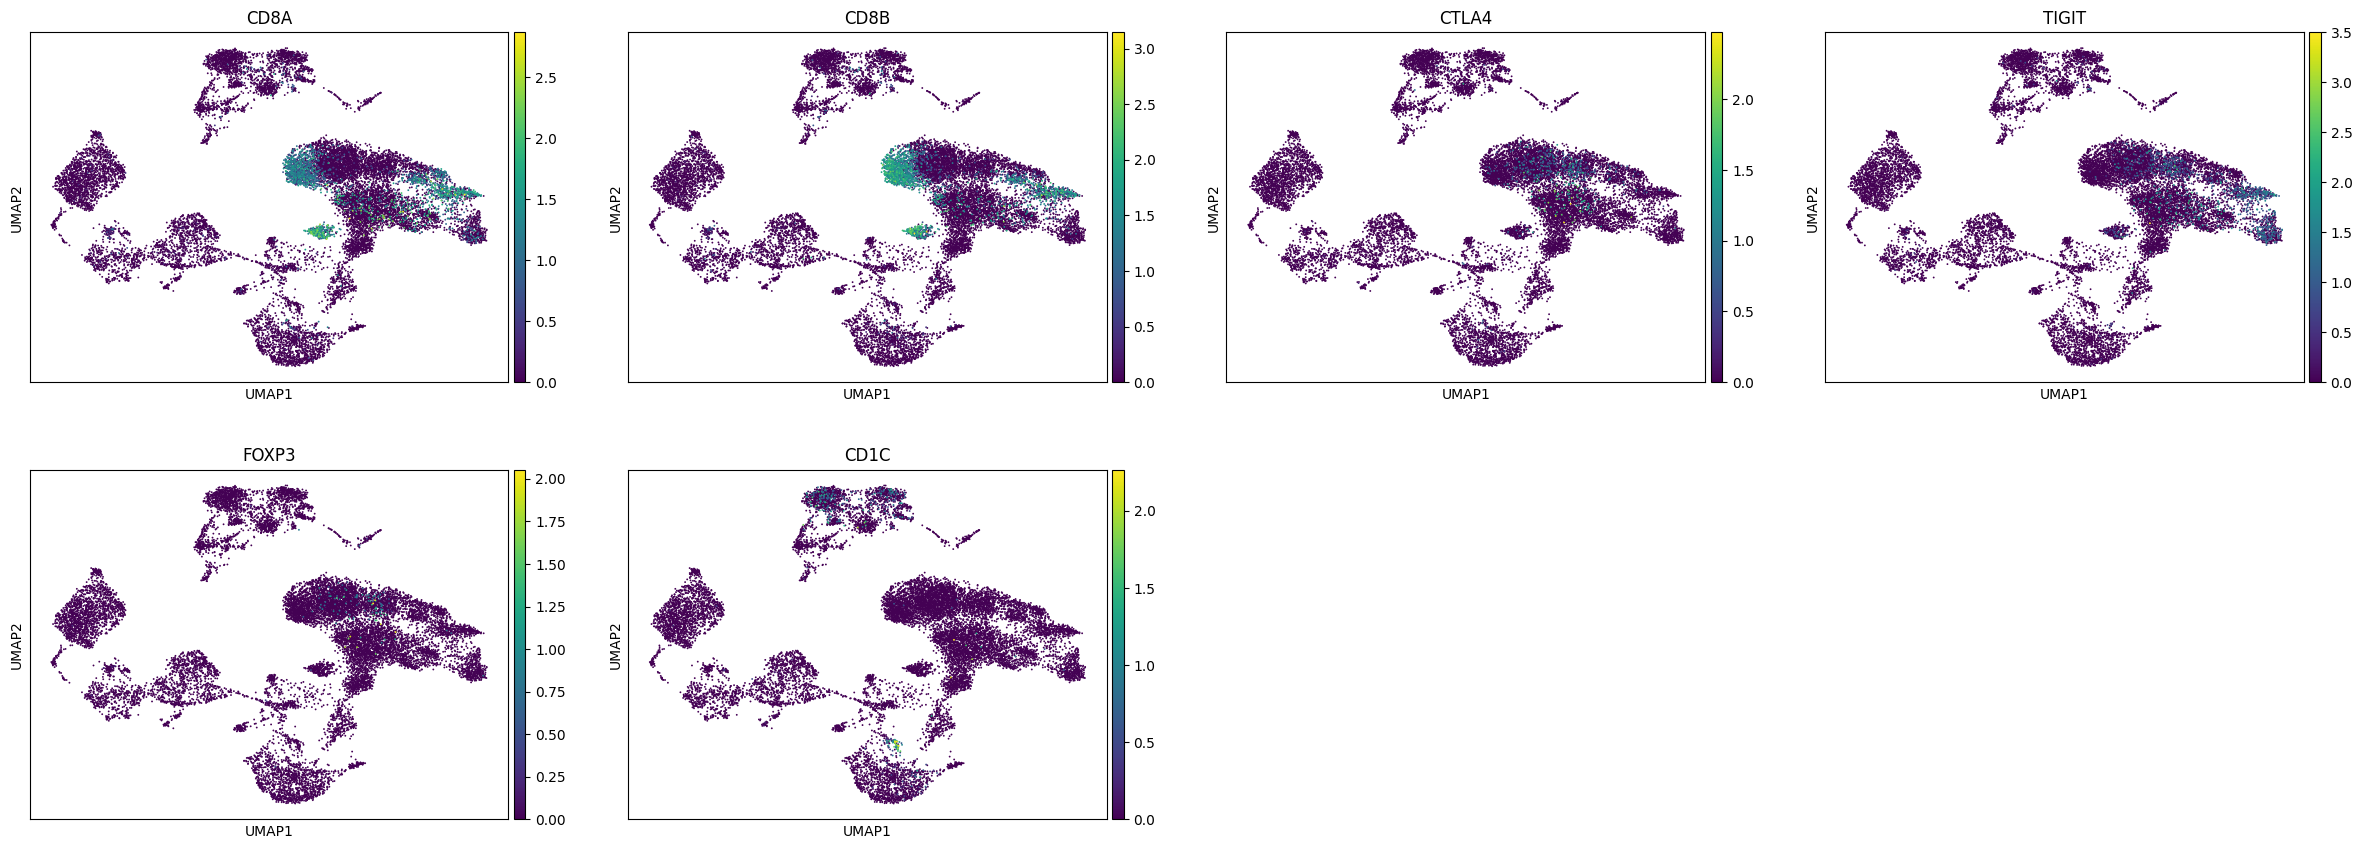

In [ ]:
sc.pl.umap(adata, color=["CD8A",'CD8B','CTLA4','TIGIT','FOXP3','CD1C'])

In [ ]:
cluster_mapping = {
    '0': 'CD8 T cell',
    '1': 'CD4 T cell',
    '2': 'Treg'}

adata.obs['leiden'] = adata.obs['leiden'].replace(cluster_mapping)

<ipython-input-28-e651b2bc6fe4>:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata.obs['leiden'] = adata.obs['leiden'].replace(cluster_mapping)


In [ ]:
adata.obs['leiden']

,leiden
AAACCCAAGGATGGCT-1,CD8 T cell
AAACCCAAGGCCTAGA-1,3
AAACCCAAGTGAGTGC-1,5
AAACCCACAAGAGGCT-1,6
AAACCCACATCGTGGC-1,CD4 T cell
...,...
TTTGTTGAGAGTCTGG-1,CD4 T cell
TTTGTTGCAGACAATA-1,3
TTTGTTGCATGTTACG-1,12
TTTGTTGGTAGTCACT-1,CD4 T cell


In [ ]:
!pip install celltypist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 93.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 70.6 MB/s eta 0:00:00


In [ ]:
import celltypist as ct

In [ ]:
ct.models.download_models(model=["Immune_All_Low.pkl"], force_update=True)

In [ ]:
model = ct.models.Model.load(model="Immune_All_Low.pkl")
predictions = ct.annotate(adata, model="Immune_All_Low.pkl", majority_voting=True)
# convert back to anndata||
adata = predictions.to_adata()

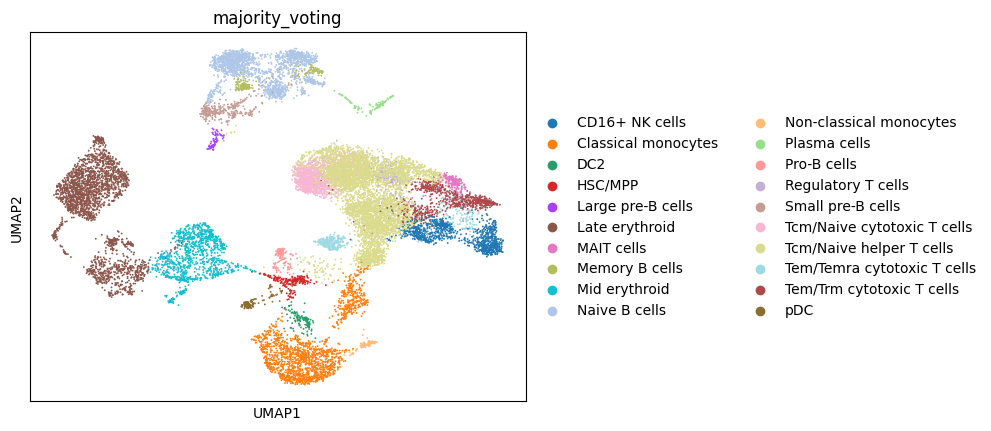

In [ ]:
sc.pl.umap(adata, color="majority_voting")